In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
new=pd.read_csv(r"C:\Users\Sawpnil\Downloads\diabetes_data_upload.csv")
new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Data Pre-processing

In [44]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [45]:
new['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [46]:
(320/520)*100 #diabetes rate

61.53846153846154

In [47]:
import plotly.express as px

fig = px.pie(new,names='class',color='class',
             color_discrete_map={'Positive':'red',
                                 'Negative':'green'})
fig.show()

In [48]:
new1= new[new.select_dtypes(include=['object']).columns.tolist()]
new1.head(3)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [49]:
from sklearn.preprocessing import LabelEncoder
new1=new1.apply(LabelEncoder().fit_transform)
new1.head(3)
# label in ascending order

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [50]:
new_com = pd.concat([new.Age, new1],axis=1)
new_com.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Data Partition

In [51]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = new_com.drop(['class'],axis=1)
y = new_com[['class']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Model building

In [52]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
265,1,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
31,1,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
62,1,55,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0
406,0,56,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0
239,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
independent_variable = list(train.columns[1:])
independent_variable

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

# Plotting the tree

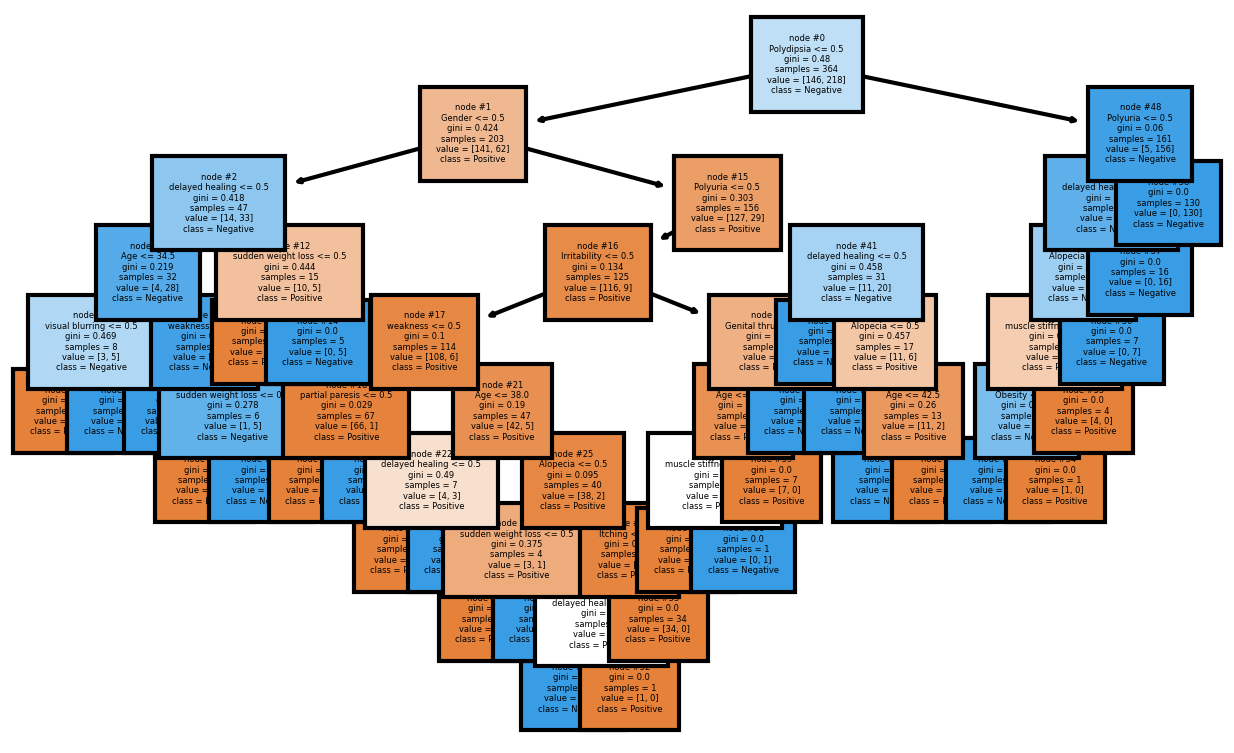

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

clas=['Positive', 'Negative']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=clas, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
fig.savefig('imagename.png')

# Predictions of train data

In [56]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Predicted
265,1,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
31,1,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
62,1,55,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1
406,0,56,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0
239,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['class'])
print(matrix)

[[146   0]
 [  0 218]]


In [58]:
Accuracy_Train=((146+218)/(364)*100)
print(Accuracy_Train) 

100.0


In [59]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       218

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



# Pruning method

In [60]:
#Import Tree Classifier model
from sklearn import tree

dt1= tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=12, #child
                                 min_samples_split=30, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=12, min_samples_split=30)

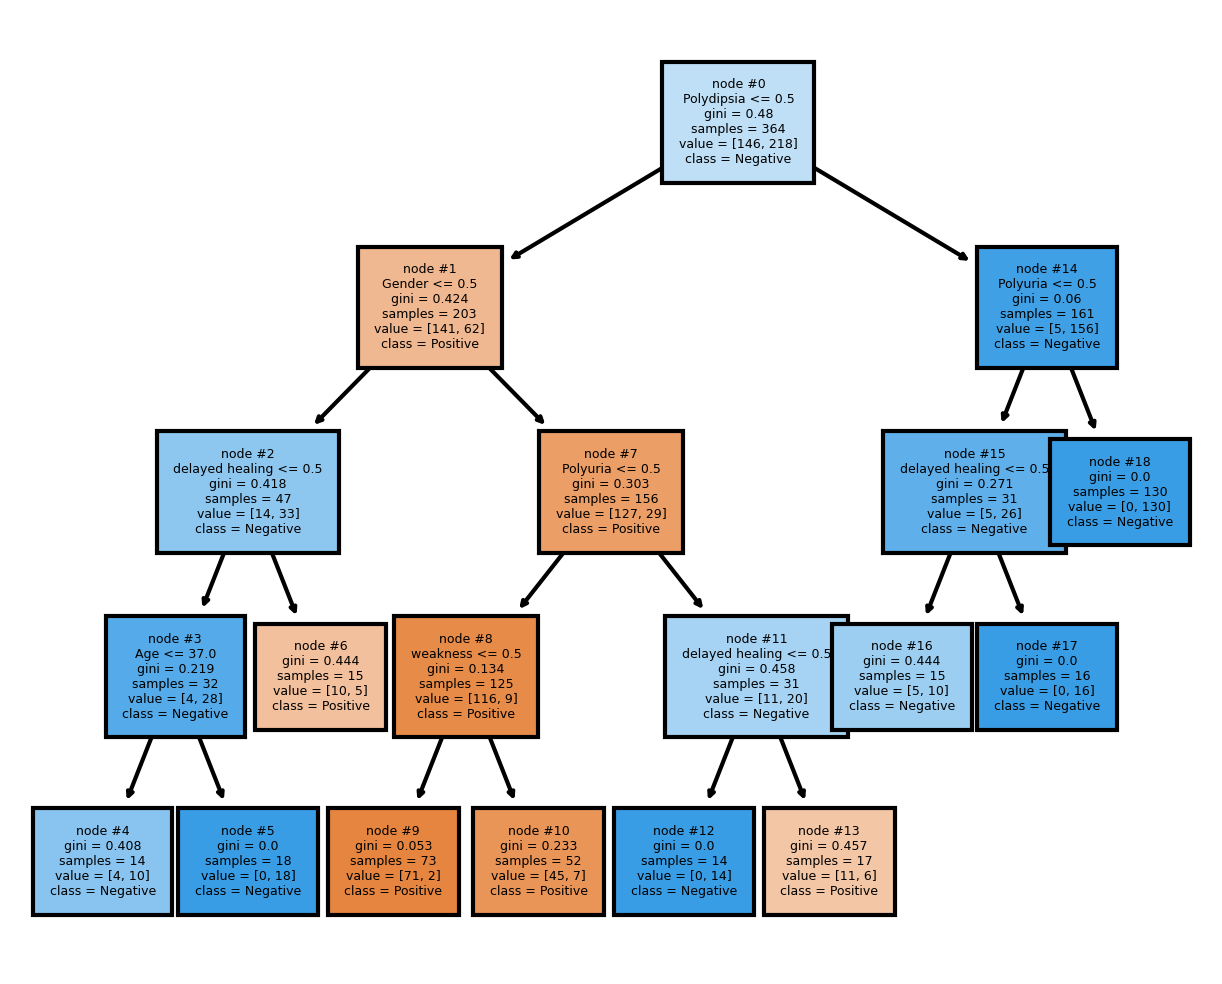

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
clas=['Positive', 'Negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt1,  # Model 
               feature_names = independent_variable,  # column name
               class_names=clas, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

# Predictions on train data with pruned model

In [62]:
train['Predicted']=dt1.predict(X_train)  # MODEL = dt
train.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Predicted
265,1,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
31,1,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
62,1,55,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1
406,0,56,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0
239,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['class'])
print(matrix)

[[137  20]
 [  9 198]]


In [64]:
Accuracy_Train=((116+209)/(364)*100)
print(Accuracy_Train)

89.28571428571429


In [65]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       146
           1       0.96      0.91      0.93       218

    accuracy                           0.92       364
   macro avg       0.91      0.92      0.92       364
weighted avg       0.92      0.92      0.92       364



# Predictions on test data with pruned model

In [66]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
117,45,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,1
435,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1
304,69,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1
128,32,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0,1
488,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [67]:
test['Predicted']=dt1.predict(X_test)
test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Predicted
117,45,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,1,1
435,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,1
304,69,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1
128,32,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0,1,1
488,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['class'])
print(confusion_matrix)

[[49 17]
 [ 5 85]]


In [69]:
Accuracy_test=((42+98)/(156)*100)
Accuracy_test

89.74358974358975

In [70]:
from sklearn.metrics import classification_report
print(classification_report(test['class'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        54
           1       0.94      0.83      0.89       102

    accuracy                           0.86       156
   macro avg       0.84      0.87      0.85       156
weighted avg       0.87      0.86      0.86       156



# Grid search

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [30,40,50], ## Parent 
           'min_samples_leaf': [8,12,15], ## Child or Leaves
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=40),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [8, 12, 15],
                         'min_samples_split': [30, 40, 50]},
             verbose=1)

In [72]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=12, min_samples_split=30,
                       random_state=40)